---
title: "[stock prediction] 3.3 ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÉêÏÉâÏùÑ ÌÜµÌïú Ï£ºÍ∞ÄÏÉÅÏäπ Ìå®ÌÑ¥ Í≤ÄÏ∂ú"
author: "agsu"
date: "7/25/2022"
format: 
  html:
    code-fold: false
jupyter: python3
categories: [project, stock prediction]
image: ../image/stock8.png
---

# 3. ÎÖºÎ¨∏ Ïó∞Íµ¨: Ï£ºÍ∞ÄÏÉÅÏäπ Ìå®ÌÑ¥ Í≤ÄÏ∂ú   
## 3.3. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÉêÏÉâÏùÑ ÌÜµÌïú Ï£ºÍ∞ÄÏÉÅÏäπ Ìå®ÌÑ¥ Í≤ÄÏ∂ú 
ÏßÄÎÇú Í∏Ä ( [3.2 t-SNEÎ•º ÏÇ¨Ïö©Ìïú Ï£ºÍ∞ÄÎç∞Ïù¥ÌÑ∞ 2Ï∞®Ïõê ÏãúÍ∞ÅÌôî](https://ag-su.github.io/blog/posts/06.tsne.html) ) ÏóêÏÑúÎäî ÏõêÎ≥∏ Ï£ºÍ∞ÄÎç∞Ïù¥ÌÑ∞ÏÖãÍ≥º SHAP ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú t-SNE 2Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôîÎ•º ÏàòÌñâÌïòÏó¨ SHAP ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Íµ∞ÏßëÏùò Í≤ΩÍ≥ÑÍ∞Ä Îçî Î™ÖÌôïÌïòÍ≤å ÎìúÎü¨ÎÇ®ÏùÑ ÌôïÏù∏ÌïòÏòÄÎã§. Ïù¥Î≤à Í∏ÄÏóêÏÑúÎäî `SHAP ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞ÏÖã`Ïóê `Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ` ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ï†ÅÏö©ÌïòÏó¨ Î™ÖÏãúÏ†ÅÏúºÎ°ú Íµ∞ÏßëÏùÑ Î∂ÑÎ•òÌï¥Î≥¥Í≥†, label1Ïùò ÎπÑÏú®Î°ú Íµ∞ÏßëÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÏó¨ `ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë`ÏùÑ ÏÑ†ÌÉùÌïúÎã§. ÏÑ†ÌÉùÎêú ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞ÏßëÏóêÏÑú ÎπàÎèÑÏàò ÏÉÅÏúÑ ÎÇ†ÏßúÎì§Ïùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏Î•º ÌôïÏù∏ÌïòÏó¨ `Í≥µÌÜµÎêú Ìå®ÌÑ¥ÏùÑ Í≤ÄÏ∂ú`ÌïúÎã§. 


### Î™©Ï∞® 
- (1) Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  
- (2) Ï†ïÎ¶¨

- ÎùºÏù¥Î∏åÎü¨Î¶¨ import  

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pymysql

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12,5)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')

import StockFunc as sf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<br>
<br>

## (1) Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù 
`ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë`Ïù¥ÎûÄ **Í∏∞Ï§ÄÏùº (D0) ÎåÄÎπÑ Îã§Ïùå ÎÇ† (D+1) Ï¢ÖÍ∞Ä 2% Ïù¥ÏÉÅ ÏÉÅÏäπ**Ìïú Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ ÏùºÏ†ï ÎπÑÏú® Ïù¥ÏÉÅ ÏÜçÌïòÎäî Íµ∞ÏßëÎì§ÏùÑ ÏùòÎØ∏ÌïúÎã§. Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ ÏÉùÏÑ±Îêú Íµ∞ÏßëÎì§ÏùÑ label1Ïùò ÎπÑÏú®Î°ú ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞ÏßëÏùÑ ÏÑ†ÌÉùÌïúÎã§. 

- linkage, Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî Ìï®Ïàò

Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑúÏùò Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôîÎ•º ÏàòÌñâÌïòÏó¨ Ìä∏Î¶¨Ïùò ÎÜíÏù¥Î•º Í≤∞Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§. 

In [2]:
def hierarchical_clustering_plot(method, year, cci_type, dendrogram=False, n_clusters=5, min_samples=5, alpha=0.3, size=4):
    '''
    method: str / complete, average, ward
    year: int / 2019, 2020, 2021
    cci_type:int / 1, 2, 3
    dendrogram:Boolean / True, False(default) - ÏãúÍ∞ÑÏù¥ Ïò§ÎûòÍ±∏Î¶¨ÎØÄÎ°ú ÏÑ†ÌÉù 
    n_clusters: int / default:5
    min_samples: int / default:5
    alpha: float / default: 0.3
    size: int / default: 4
    '''

    import pickle # tsne ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ 
    with open(f'np_tsne_shap_{year}_{cci_type}', 'rb') as handle: 
        np_tsne = pickle.load(handle)
    
    if method in ('complete', 'average', 'ward'): # linkage method ÏÑ†ÌÉù 
        from scipy.cluster.hierarchy import linkage, dendrogram
        import matplotlib.pyplot as plt
        clusters = linkage(y=np_tsne, method=method, metric='euclidean')
        print("linkage complete")
        
        if dendrogram: # True: Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî 
            plt.title(f"{year} dendrogram", fontsize=15)
            dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
            plt.show() 
            
        return clusters 
        
    else:
        print("methodÎ•º ÏûòÎ™ª ÏûÖÎ†•ÌïòÏòÄÏäµÎãàÎã§.")

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ, ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù ÏãúÍ∞ÅÌôî

Îç¥ÎìúÎ°úÍ∑∏Îû®ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ `40 ~ 60Í∞úÏùò Íµ∞Ïßë`Ïù¥ ÌòïÏÑ±ÎêòÎèÑÎ°ù tÎ•º ÏÑ§Ï†ïÌïúÎã§. ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞ÏßëÏùÑ ÏÑ†ÌÉùÌïòÍ∏∞ ÏúÑÌï¥ Ï†ÅÏ†àÌïú ratio(ÌäπÏ†ï ÏßëÎã®ÏóêÏÑúÏùò label1Ïùò ÎπÑÏú®)Í∞íÏùÑ ÏßÄÏ†ïÌï¥Ï£ºÎäîÎç∞, `Íµ∞ÏßëÏùò Í∞úÏàòÎäî 4 ~ 10Í∞ú`, `Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎäî 3000 ~ 6000Í∞ú` ÏÇ¨Ïù¥Í∞Ä ÎêòÎèÑÎ°ù ÏÑ§Ï†ïÌïúÎã§. 

In [28]:
def fcluster_plot_and_filtering(np_clusters, year, cci_type, t=30, ratio=0.5, alpha=0.3, size=4, xlim=70, ylim=70):
    '''
    np_clusters: np.array
    year: int / 2019, 2020, 2021
    cci_type: int / 1, 2, 3 
    t: int / default: 30 (Îç¥ÎìúÎ°úÍ∑∏Îû® Ìä∏Î¶¨Ïùò ÎÜíÏù¥) 
    ratio: float / default:0.5 (1Ïùò ÎπÑÏú®Ïù¥ ÏßÄÏ†ï)  
    '''
    
    from scipy.cluster.hierarchy import fcluster # ÏßÄÏ†ïÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏûêÎ•¥Í∏∞
    import pickle     
    
    
    with open('all_dataset', 'rb') as handle: # Code, Date, Label Ï†ïÎ≥¥Í∞Ä Î™®Îëê Îì§Ïñ¥ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
        dict_all_dataset = pickle.load(handle)
        
    with open(f'np_tsne_shap_{year}_{cci_type}', 'rb') as handle: # Ïó∞ÎèÑ, CCI Íµ¨Í∞ÑÏóê ÎßûÎäî tsne Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
        np_tsne = pickle.load(handle)
    
    df_shap_cci = dict_all_dataset[cci_type][1]
    df_shap_year = df_shap_cci[(df_shap_cci['Date'] >= f'{year}-01-01') & (df_shap_cci['Date'] <= f'{year}-12-31')].reset_index(drop=True) # Ïó∞ÎèÑÏóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
    
    cut_tree = fcluster(np_clusters, t=t, criterion='distance') # Íµ∞ÏßëÌôî Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ 
    print("Íµ∞ÏßëÏùò Í∞úÏàò:", len(pd.DataFrame(cut_tree)[0].unique())) # Íµ∞ÏßëÏùò Í∞úÏàò Ï∂úÎ†• 
    
    ##### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏãúÍ∞ÅÌôî 
    fig = plt.figure(figsize=(15, 5))
    ax1, ax2 = fig.subplots(1, 2)
        
    scatter = ax1.scatter(x=np_tsne[:, 0], y=np_tsne[:, 1], c=cut_tree, cmap='gist_rainbow', alpha=alpha, s=size) # Íµ∞Ïßë(cut_tree)Î≥ÑÎ°ú ÏãúÍ∞ÅÌôî 
    ax1.legend(*scatter.legend_elements())
    ax1.set_title(f"{year} Hierarchical Clustering", fontsize=15)
    
    ##### ÎùºÎ≤® 1Ïùò ÎπÑÏú®ÏùÑ ÏÇ¨Ïö©Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌïÑÌÑ∞ÎßÅ: ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù
    df_tsne = pd.DataFrame(np_tsne, columns=['component1', 'component2'])
    df_tsne['Code'], df_tsne['Date'], df_tsne['Label'], df_tsne['Cluster'] = df_shap_year['Code'], df_shap_year['Date'], df_shap_year['Label'], cut_tree
    
    gb = df_tsne.groupby('Cluster')['Label'].value_counts(sort=False).unstack() # Íµ∞Ïßë Î≥Ñ ÎùºÎ≤® Í∞úÏàò
    idx_label_1 = gb[gb[1]/(gb[0]+gb[1]) > ratio].index # label 1Ïùò ÎπÑÏú®Ïù¥ ratio Ïù¥ÏÉÅÏù∏ Íµ∞Ïßë Î≤àÌò∏
    print(f'label 1 > {ratio} Íµ∞Ïßë Î≤àÌò∏: ', idx_label_1)
    df_tsne_1 = df_tsne[df_tsne['Cluster'].isin(idx_label_1)] # ÎùºÎ≤® 1Ïùò ÎπÑÏú®Ïù¥ ratio Ïù¥ÏÉÅÏù∏ Íµ∞Ïßë Ï∂îÏ∂ú (ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë)
    print("Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò:", len(df_tsne_1))
    print("Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò:", df_tsne_1['Code'].nunique(), " | ", "ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò: ", df_tsne_1['Date'].nunique())
    
    ##### ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏãúÍ∞ÅÌôî 
    ax2.set_title(f"label 1 > {ratio}", fontsize=15)
    scatter = ax2.scatter(df_tsne_1['component1'],df_tsne_1['component2'],c=df_tsne_1['Cluster'], cmap='gist_rainbow', s=3, alpha=0.4)
    ax2.legend(*scatter.legend_elements())
    ax2.set_ylim(-ylim, ylim) # tsne Î≤îÏúÑÏôÄ ÎßûÏ∂îÍ∏∞
    ax2.set_xlim(-xlim, xlim)
        
    return df_shap_year, df_tsne_1

- **Ï£º Ïª¨Îüº** ÏÉùÏÑ± Î∞è **ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£º** ÏãúÍ∞ÅÌôî Ìï®Ïàò

**[Ï£º Ïª¨Îüº ÏÉùÏÑ± Ï∞∏Í≥†]**  
-[(Python) Í∑∏ ÎÇ†ÏßúÍ∞Ä Î™á Ï£ºÏß∏Ïù∏ÏßÄ Í≥ÑÏÇ∞ÌïòÍ∏∞](https://soooprmx.com/python-%EA%B7%B8-%EB%82%A0%EC%A7%9C%EA%B0%80-%EB%AA%87-%EC%A3%BC%EC%A7%B8%EC%9D%B8%EC%A7%80-%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0/)

In [5]:
def visualization_week(data_list, week_num=3, day_num=5): # ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£º ÏãúÍ∞ÅÌôî 
    ##### Ï£º Ïª¨Îüº ÏÉùÏÑ±
    def get_week_no(target):  
        from datetime import timedelta

        firstday = target.replace(day=1)

        if firstday.weekday() == 6:
            origin = firstday
        elif firstday.weekday() < 3:
            origin = firstday - timedelta(days=firstday.weekday() + 1)
        else:
            origin = firstday + timedelta(days=6-firstday.weekday())

        return f'{target.month}Ïõî {(target - origin).days // 7 + 1}Ï£ºÏ∞®'

    mpl.rcParams['font.family'] = 'NanumSquare'    
    fig = plt.figure(figsize=(11, 5))
    ax = fig.subplots(2, 3)
    lst_year = [2019, 2020, 2021]

    ##### Ïó∞ÎèÑ Î≥Ñ ÏÉÅÏúÑ ÎπàÎèÑÏàò Ï£º, ÎÇ†Ïßú ÏãúÍ∞ÅÌôî 
    for i, data in enumerate(data_list): # Ïó∞ÎèÑ Î≥Ñ Îç∞Ïù¥ÌÑ∞ÏÖã 
        data['Date'] = pd.to_datetime(data['Date']).dt.date # datetime type Î≥ÄÍ≤Ω 
        data['date_month_week'] = data['Date'].apply(get_week_no) # xxÏõî xxÏ£ºÏ∞® Ïª¨Îüº ÏÉùÏÑ± 
        df_week = pd.DataFrame(data['date_month_week'].value_counts().head(week_num)).reset_index().rename(columns={'index':'month-week', 'date_month_week':'count'}) # ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£ºÏ∞® 5Í∞ú 
        df_day = pd.DataFrame(data['Date'].value_counts().head(day_num)).reset_index().rename(columns={'index':'Date', 'Date':'count'}) # ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£ºÏ∞® 5Í∞ú 
        
        ax[0, i].set_title(f"<{lst_year[i]}ÎÖÑ ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£º>")
        sns.barplot(data=df_week, x='count', y='month-week', palette="Pastel1", ax=ax[0, i])

        for height, p in enumerate(ax[0, i].patches):
            width = p.get_width()
            ax[0, i].text(width, height+0.2, f'{round(p.get_width())}', ha = 'center', size = 13)

        ax[1, i].set_title(f"<{lst_year[i]}ÎÖÑ ÎπàÎèÑÏàò ÏÉÅÏúÑ ÎÇ†Ïßú>")
        sns.barplot(data=df_day, x='count', y='Date', palette="Pastel1", ax=ax[1, i])

        for height, p in enumerate(ax[1, i].patches):
            width = p.get_width()
            ax[1, i].text(width , height+0.2, f'{round(p.get_width())}', ha = 'center', size = 13)
    
    plt.xlabel("")
    plt.ylabel("")
    
    plt.tight_layout()
    plt.show()

<br>

### 1) Ï§ëÎ¶ΩÍµ¨Í∞Ñ - CCI : (-20, 20)

#### I. 2019

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


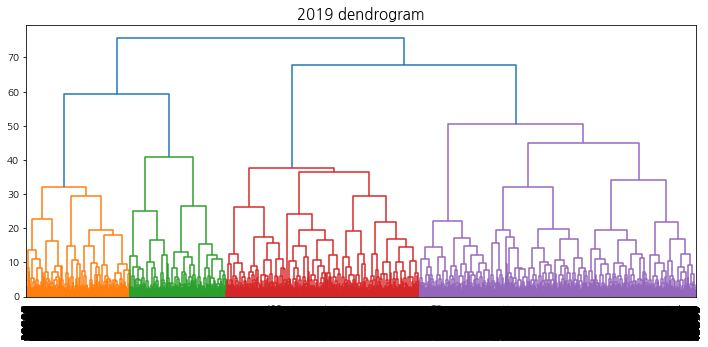

In [6]:
clusters_2019_1 = hierarchical_clustering_plot(method='average', year=2019, cci_type=1, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 53
label 1 > 0.22 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([21, 23, 24, 26, 27, 36, 47, 49], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 4313
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1024  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  246


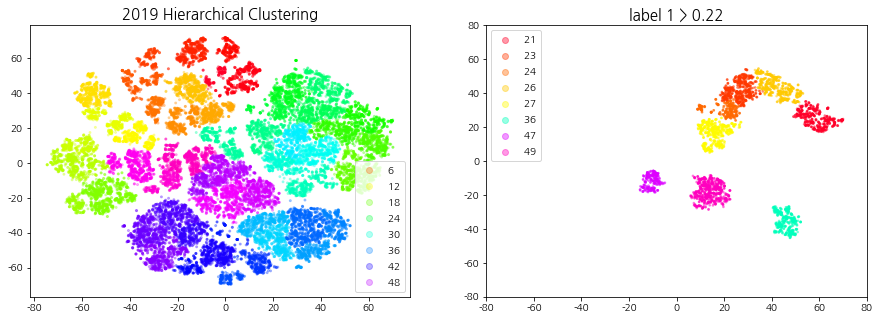

In [29]:
df_shap_2019_1, df_tsne_2019_1_1 = fcluster_plot_and_filtering(clusters_2019_1, 2019, 1, t=13, ratio=0.22, xlim=80, ylim=80)

<br>

#### II. 2020

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


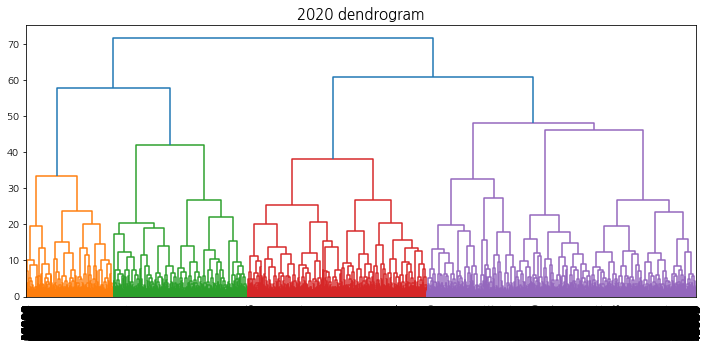

In [8]:
clusters_2020_1 = hierarchical_clustering_plot(method='average', year=2020, cci_type=1, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 53
label 1 > 0.29 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([24, 26, 27, 30, 38, 40, 41, 42, 43], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 4827
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1306  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  247


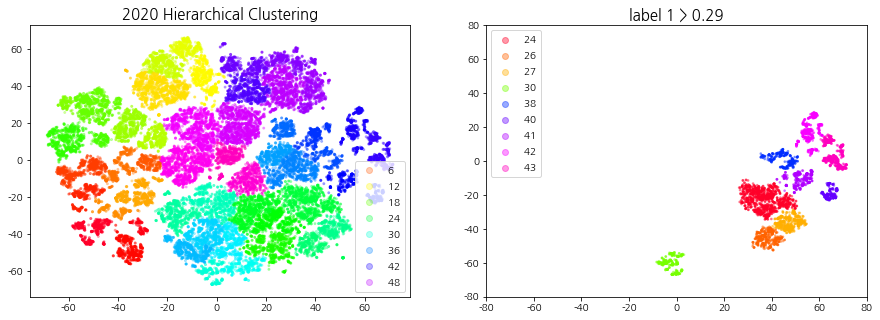

In [30]:
df_shap_2020_1, df_tsne_2020_1_1 = fcluster_plot_and_filtering(clusters_2020_1, 2020, 1, t=13, ratio=0.29, xlim=80, ylim=80)

<br>

#### III. 2021

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


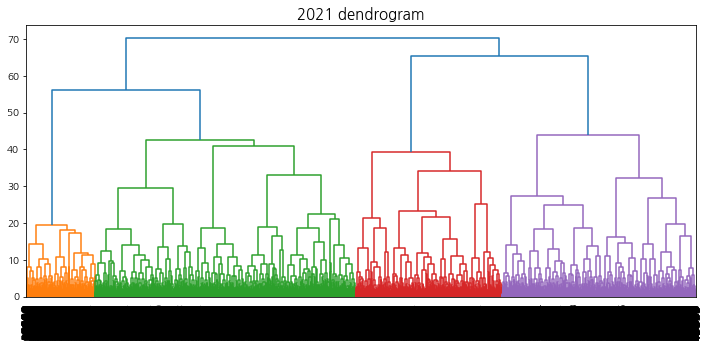

In [12]:
clusters_2021_1 = hierarchical_clustering_plot(method='average', year=2021, cci_type=1, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 51
label 1 > 0.207 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([3, 4, 13, 18, 21, 22, 24, 25], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 4237
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1092  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  237


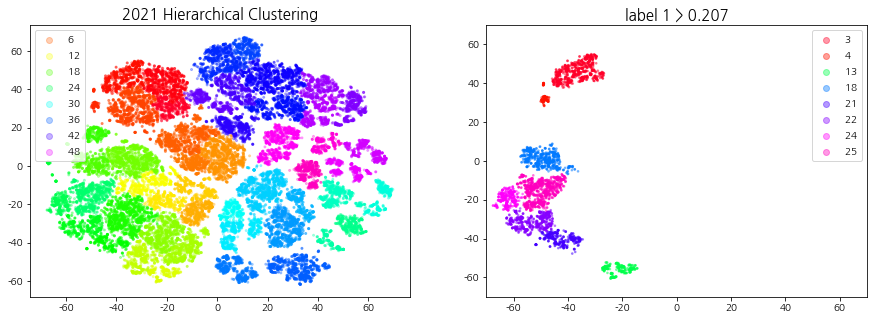

In [31]:
df_shap_2021_1, df_tsne_2021_1_1 = fcluster_plot_and_filtering(clusters_2021_1, 2021, 1, t=13, ratio=0.207)

<br>

#### üåü Ï§ëÎ¶ΩÍµ¨Í∞Ñ ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë Ìï¥ÏÑù 

1) Ïó∞ÎèÑÎ≥Ñ ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£º & ÎÇ†Ïßú

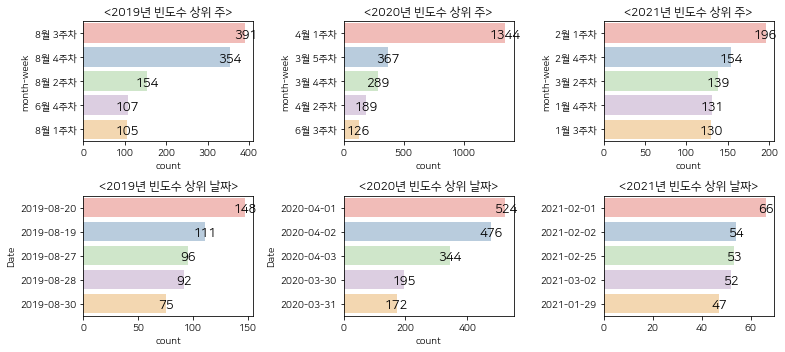

In [203]:
lst_data = [df_tsne_2019_1_1, df_tsne_2020_1_1, df_tsne_2021_1_1]
visualization_week(data_list=lst_data, week_num=5, day_num=5)

`Ï§ëÎ¶ΩÍµ¨Í∞Ñ`ÏóêÏÑú ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë Îç∞Ïù¥ÌÑ∞Ïùò ÎÇ†Ïßú ÎπàÎèÑÏàòÎäî **2019ÎÖÑÎèÑ**Îäî **8Ïõî 3Ï£ºÏ∞®**, **2020ÎÖÑÎèÑ**Îäî **4Ïõî 1Ï£ºÏ∞®**, **2021ÎÖÑÎèÑ**Îäî **2Ïõî 1Ï£ºÏ∞®**Í∞Ä Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÏôîÎã§. Í∑∏ Ï§ëÏóêÏÑúÎèÑ Í∞ÄÏû• ÌÅ∞ ÎÇ†Ïßú ÎπàÎèÑ Ï∞®Ïù¥Î•º Î≥¥Ïù∏ Ïó∞ÎèÑÎäî **2020ÎÖÑ**Ïù¥ÏóàÎã§.

<br>

2. Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÎÇ†ÏßúÏùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏ ÌôïÏù∏ 

- Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÎÇ†ÏßúÏùò ÎûúÎç§ Ï¢ÖÎ™©ÏΩîÎìú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±   

ÏÉÅÏúÑ ÎÇ†ÏßúÎì§ÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ Ïã§ÌñâÌïòÍ≥†, ÎûúÎç§ÏúºÎ°ú ÎÇòÏò§Îäî Ï¢ÖÎ™©ÏΩîÎìúÎì§Ïùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏Î•º ÌôïÏù∏ÌïúÎã§.  

In [14]:
#collapse-hide
import datetime
df_tsne_2019_1_1['Date'] = df_tsne_2019_1_1['Date'].astype(str)
df_tsne_2020_1_1['Date'] = df_tsne_2020_1_1['Date'].astype(str)
df_tsne_2021_1_1['Date'] = df_tsne_2021_1_1['Date'].astype(str)

df1 = df_tsne_2019_1_1.loc[df_tsne_2019_1_1['Date'] == '2019-08-20', ['Date', 'Code']].sample(5).reset_index(drop=True)
df2 = df_tsne_2020_1_1.loc[df_tsne_2020_1_1['Date'] == '2020-04-01', ['Date', 'Code']].sample(5).reset_index(drop=True)
df3 = df_tsne_2021_1_1.loc[df_tsne_2021_1_1['Date'] == '2021-02-01', ['Date', 'Code']].sample(5).reset_index(drop=True)

pd.concat([df1, df2, df3], axis=1)

Date    Code        Date    Code        Date    Code
0  2019-08-20  007540  2020-04-01  160980  2021-02-01  023800
1  2019-08-20  047400  2020-04-01  119850  2021-02-01  033240
2  2019-08-20  010820  2020-04-01  041190  2021-02-01  038110
3  2019-08-20  020120  2020-04-01  024110  2021-02-01  039020
4  2019-08-20  081150  2020-04-01  002900  2021-02-01  001810

- Ï∞®Ìä∏ ÌôïÏù∏ ÏòàÏãú

**2019ÎÖÑ 8Ïõî 20Ïùº**  
![image.png](attachment:5810adda-e94a-40e3-ba40-aa2999b0bdc0.png "Ï¢ÖÎ™©ÏΩîÎìú: 082800")
 
**2020ÎÖÑ 4Ïõî 1Ïùº**  
![image.png](attachment:1d44cba8-eb4c-40ab-824f-595ebe93dd73.png "Ï¢ÖÎ™©ÏΩîÎìú: 089890")

**2021ÎÖÑ 2Ïõî 1Ïùº**    
![image.png](attachment:e6f731bb-780b-438f-a325-bcd2c8e8b713.png "Ï¢ÖÎ™©ÏΩîÎìú: 033240")
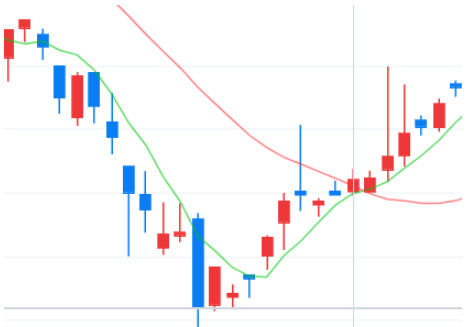
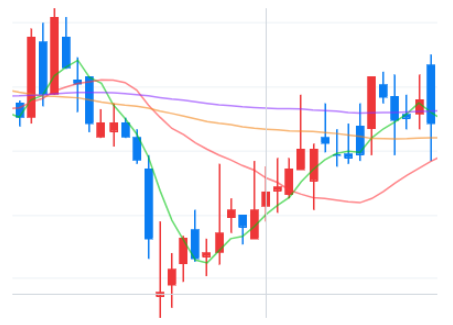
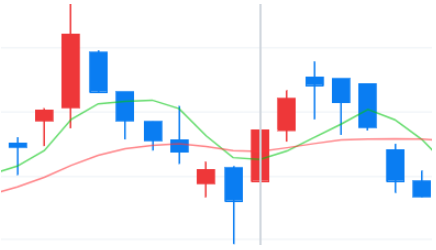

Ïó¨Îü¨Í∞úÏùò Ï∞®Ìä∏ ÌôïÏù∏ÏùÑ Ìï¥Î≥¥ÏïòÏùÑ Îïå, Í∞ÄÏû• ÌÅ∞ ÎÇ†Ïßú Ìé∏Ï§ëÏùÑ Î≥¥ÏòÄÎçò **2020ÎÖÑÎèÑ**Îäî **Ï∞®Ìä∏Ïùò Ìå®ÌÑ¥Ïù¥ Í∞ÄÏû• ÏùºÏ†ï**ÌïòÍ≤å ÎÇòÌÉÄÎÇ¨ÏúºÎ©∞, 2019,2021ÎÖÑÎèÑÎäî 2020ÎÖÑÎèÑ ÎßåÌÅº ÏùºÏ†ïÌïú Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù¥ÏßÄÎäî ÏïäÏïòÎã§. ÌïòÏßÄÎßå ÏÑ∏ Ïó∞ÎèÑÏóêÏÑú Í≥µÌÜµÏ†ÅÏúºÎ°ú ÎÇòÏò§Îäî Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌñàÎã§. Ìï¥Îãπ Ìå®ÌÑ¥ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥ÏïòÏùÑ Îïå, ÏúÑÏùò ÏÑ∏ ÏÇ¨ÏßÑÍ≥º Í∞ôÏù¥, `ÌïòÎùΩ Ï∂îÏÑ∏ÏóêÏÑú ÏÉÅÏäπ Ï∂îÏÑ∏Î°ú Ï†ÑÌôò`ÎêòÎäî `VÏûê` ÌòïÌÉúÏòÄÏúºÎ©∞, Í∑∏ Ï§ëÏóêÏÑúÎèÑ `Í∏∞Ï§ÄÏùº(D0)[ÌöåÏÉâ ÏÑ†]Ïù¥ Ïò§Î•∏Ï™ΩÏóê ÏúÑÏπò`ÌïúÎã§Îäî Í≥µÌÜµÏ†êÏù¥ ÏûàÏóàÎã§.  

<br>
<br>

### 2) Í≥ºÏó¥Íµ¨Í∞Ñ/Í≥ºÎß§ÏàòÍµ¨Í∞Ñ - CCI : (100,  ‚àû )

#### I. 2019

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


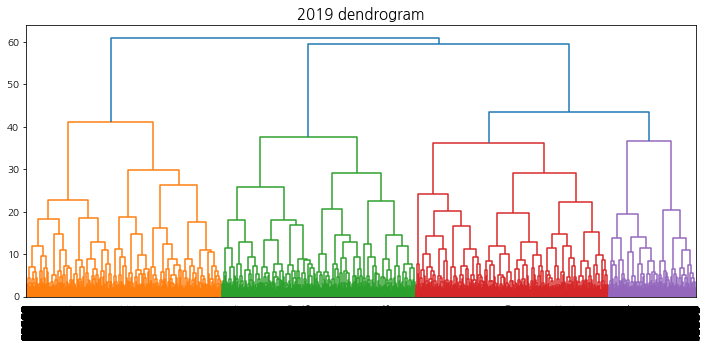

In [15]:
clusters_2019_2 = hierarchical_clustering_plot(method='average', year=2019, cci_type=2, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 48
label 1 > 0.25 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([8, 16, 17, 21, 30], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 5016
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1023  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  246


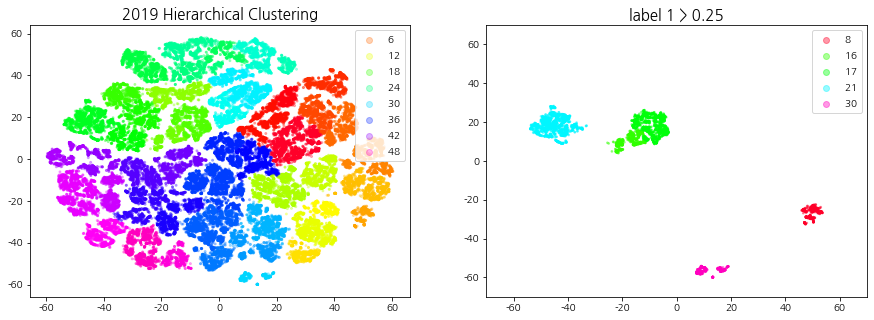

In [32]:
df_shap_2019_2, df_tsne_2019_1_2 = fcluster_plot_and_filtering(clusters_2019_2, 2019, 2, t=12, ratio=0.25)

<br>

#### II. 2020

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


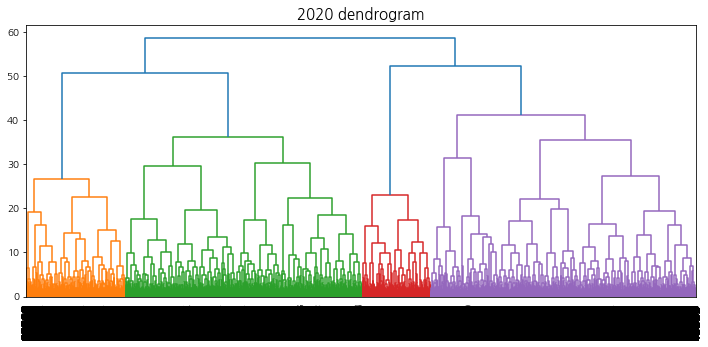

In [17]:
clusters_2020_2 = hierarchical_clustering_plot(method='average', year=2020, cci_type=2, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 55
label 1 > 0.31 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([1, 14, 16, 22, 36, 39], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 5457
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1190  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  247


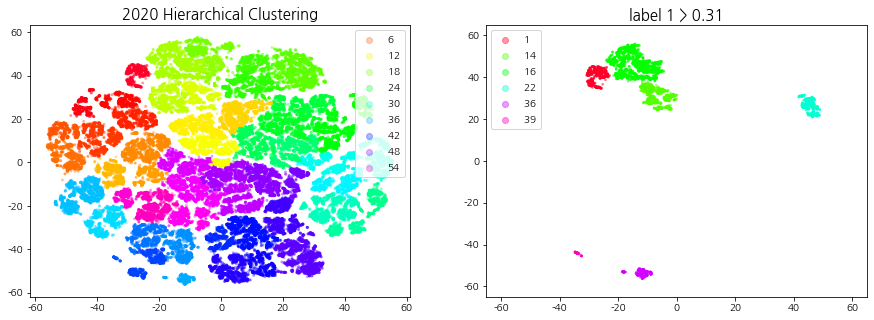

In [33]:
df_shap_2020_2, df_tsne_2020_1_2 = fcluster_plot_and_filtering(clusters_2020_2, 2020, 2, t=11, ratio=0.31, xlim=65, ylim=65)

<br>

#### III. 2021

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


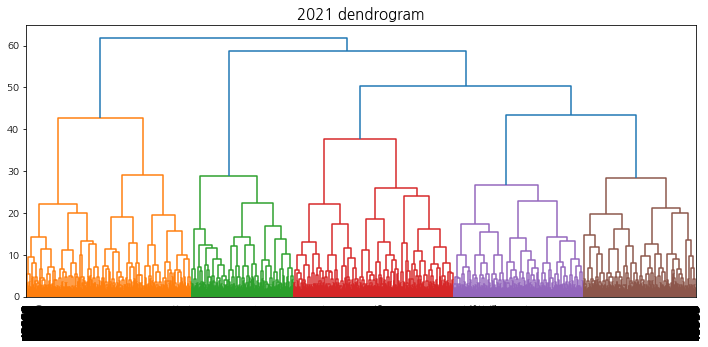

In [19]:
clusters_2021_2 = hierarchical_clustering_plot(method='average', year=2021, cci_type=2, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 52
label 1 > 0.268 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([5, 9, 14, 16, 31, 32, 43, 51], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 5632
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1110  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  237


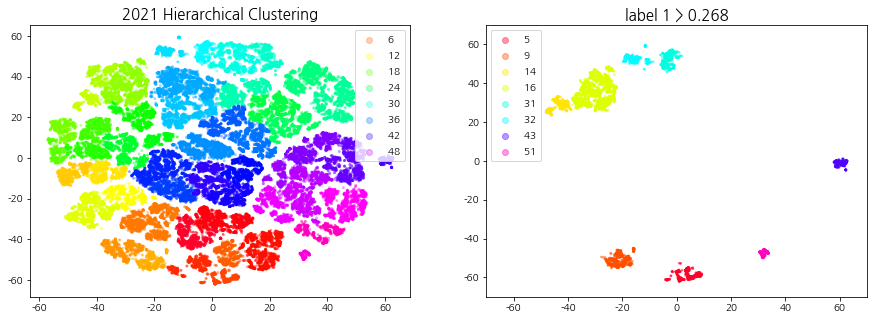

In [34]:
df_shap_2021_2, df_tsne_2021_1_2 = fcluster_plot_and_filtering(clusters_2021_2, 2021, 2, t=12, ratio=0.268)

<br>

#### üåü Í≥ºÎß§ÏàòÍµ¨Í∞Ñ ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë Ìï¥ÏÑù 

1) Ïó∞ÎèÑÎ≥Ñ ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£º & ÎÇ†Ïßú

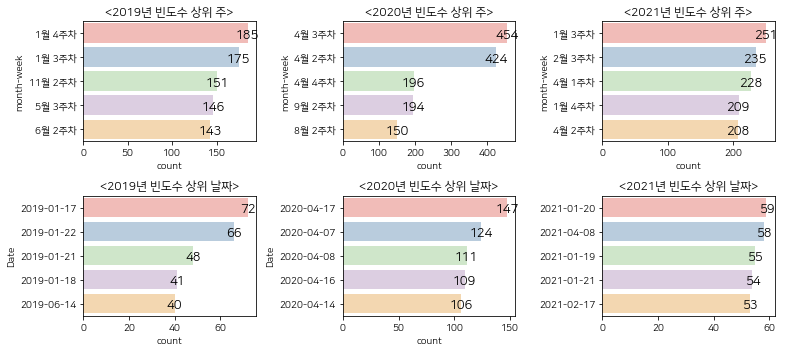

In [204]:
lst_data = [df_tsne_2019_1_2, df_tsne_2020_1_2, df_tsne_2021_1_2]
visualization_week(data_list=lst_data, week_num=5, day_num=5)

`Í≥ºÎß§ÏàòÍµ¨Í∞Ñ`ÏóêÏÑú ÎπàÎèÑÏàòÍ∞Ä ÎÜíÏùÄ ÎÇ†ÏßúÎäî **2019ÎÖÑ 1Ïõî 4Ï£ºÏ∞®**, **2020ÎÖÑ 4Ïõî 3Ï£ºÏ∞®**, **2021ÎÖÑ 1Ïõî 3Ï£ºÏ∞®**ÏûÑÏùÑ Ïïå Ïàò Ïûà ÏäµÎãàÎã§. Îã§Î•∏ CCI Íµ¨Í∞ÑÏóê ÎπÑÌï¥ ÏÉÅÏúÑ ÎπàÎèÑÏàòÏùò ÌÅ¨Í∏∞ Ï∞®Ïù¥Í∞Ä ÎßéÏßÄ ÏïäÏïòÎã§. Í∞ÄÏû• ÎÜíÏùÄ ÎÇ†Ïßú ÎπàÎèÑ Ï∞®Ïù¥Î•º Î≥¥Ïù¥Îäî Ïó∞ÎèÑÎäî Ï§ëÎ¶ΩÍµ¨Í∞ÑÍ≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú **2020ÎÖÑÎèÑ**ÏòÄÎã§. 

<br>

2) Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÎÇ†ÏßúÏùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏ ÌôïÏù∏ 

- Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÎÇ†ÏßúÏùò ÎûúÎç§ Ï¢ÖÎ™©ÏΩîÎìú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±   

ÏÉÅÏúÑ ÎÇ†ÏßúÎì§ÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ Ïã§ÌñâÌïòÍ≥†, ÎûúÎç§ÏúºÎ°ú ÎÇòÏò§Îäî Ï¢ÖÎ™©ÏΩîÎìúÎì§Ïùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏Î•º ÌôïÏù∏ÌïúÎã§.  

In [22]:
#collapse-hide
import datetime
df_tsne_2019_1_2['Date'] = df_tsne_2019_1_2['Date'].astype(str)
df_tsne_2020_1_2['Date'] = df_tsne_2020_1_2['Date'].astype(str)
df_tsne_2021_1_2['Date'] = df_tsne_2021_1_2['Date'].astype(str)

df1 = df_tsne_2019_1_2.loc[df_tsne_2019_1_2['Date'] == '2019-01-17', ['Date', 'Code']].sample(5).reset_index(drop=True)
df2 = df_tsne_2020_1_2.loc[df_tsne_2020_1_2['Date'] == '2020-04-17', ['Date', 'Code']].sample(5).reset_index(drop=True)
df3 = df_tsne_2021_1_2.loc[df_tsne_2021_1_2['Date'] == '2021-01-20', ['Date', 'Code']].sample(5).reset_index(drop=True)

pd.concat([df1, df2, df3], axis=1)

Date    Code        Date    Code        Date    Code
0  2019-01-17  042370  2020-04-17  008250  2021-01-20  095340
1  2019-01-17  187220  2020-04-17  017550  2021-01-20  025880
2  2019-01-17  024900  2020-04-17  035620  2021-01-20  011500
3  2019-01-17  106240  2020-04-17  011370  2021-01-20  010690
4  2019-01-17  007390  2020-04-17  048430  2021-01-20  000270

- Ï∞®Ìä∏ ÌôïÏù∏ ÏòàÏãú

**2019ÎÖÑ 1Ïõî 17Ïùº**  
![image.png](attachment:37f326f7-059b-4921-8558-cef135b24ee1.png "Ï¢ÖÎ™©ÏΩîÎìú: 187220")

**2020ÎÖÑ 4Ïõî 17Ïùº**  
![image.png](attachment:fd18d37b-2edd-45de-8645-14c7ed11280c.png "Ï¢ÖÎ™©ÏΩîÎìú: 035620")

**2021ÎÖÑ 1Ïõî 20Ïùº**  
![image.png](attachment:93e05fb5-8bf0-4904-befc-71203049da61.png "Ï¢ÖÎ™©ÏΩîÎìú: 010690")
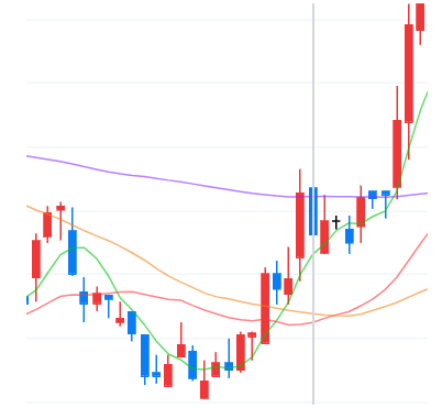
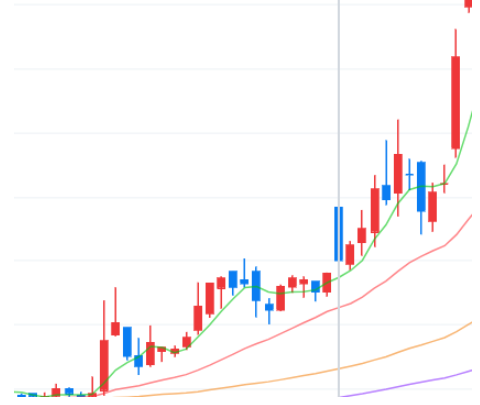
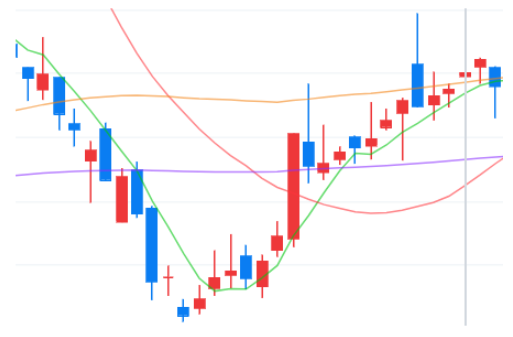

`Í≥ºÎß§ÏàòÍµ¨Í∞Ñ`ÏùÄ 20Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†Ïùò ÏúÑÏóê Í∑πÎã®Ï†ÅÏúºÎ°ú Îñ®Ïñ¥Ï†∏ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ÎØÄÎ°ú, Í∏∞Ï§ÄÏùº(D0)[ÌöåÏÉâ ÏÑ†]Ïù¥ ÏÉÅÏäπÏ∂îÏÑ∏ÏóêÏÑúÏùò Ï§ëÍ∞Ñ ~ ÎÅù Î¨¥Î†µÏóê ÏúÑÏπòÌïòÏòÄÎã§. Îã§Î•∏ CCI Íµ¨Í∞ÑÎ≥¥Îã§ Ìå®ÌÑ¥Ïù¥ Í∞ÄÏû• Î∂àÍ∑úÏπôÏ†ÅÏù¥ÏóàÏßÄÎßå, `ÌïòÎùΩÏ∂îÏÑ∏ÏóêÏÑú ÏÉÅÏäπÏ∂îÏÑ∏Î°ú Ï†ÑÌôòÎêòÎäî VÏûê ÌòïÌÉúÏóêÏÑú ÏÉÅÏäπÏ∂îÏÑ∏ ÎÅùÎ¨¥Î†µÏóê ÏúÑÏπò`ÌïòÎäî Í≥µÌÜµÎêú Ìå®ÌÑ¥ÏùÑ **ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞**ÏóêÏÑú Í≤ÄÏ∂úÌï† Ïàò ÏûàÏóàÎã§.  

<br>
<br>

### 3) Ïπ®Ï≤¥Íµ¨Í∞Ñ/Í≥ºÎß§ÎèÑÍµ¨Í∞Ñ - CCI : (- ‚àû ,-100)

#### I. 2019

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


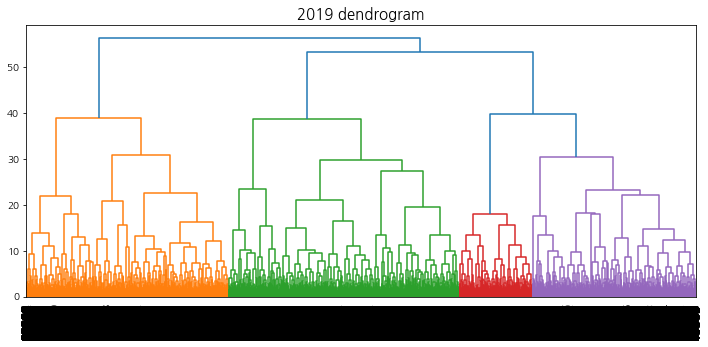

In [23]:
clusters_2019_3 = hierarchical_clustering_plot(method='average', year=2019, cci_type=3, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 58
label 1 > 0.365 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([1, 2, 25, 26, 50], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 3959
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 994  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  222


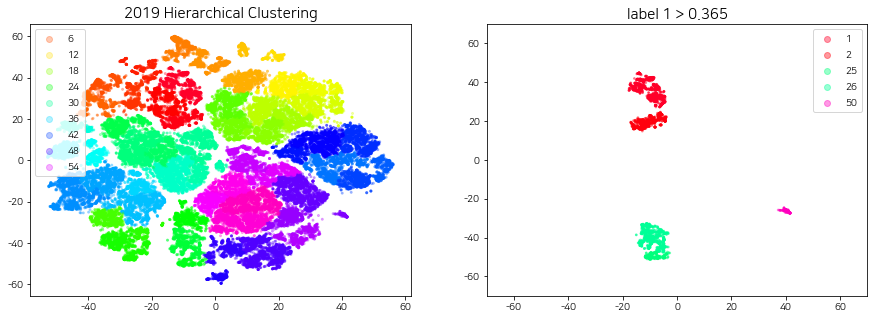

In [42]:
df_shap_2019_3, df_tsne_2019_1_3 = fcluster_plot_and_filtering(clusters_2019_3, 2019, 3, t=10, ratio=0.365)

<br>

#### II. 2020

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


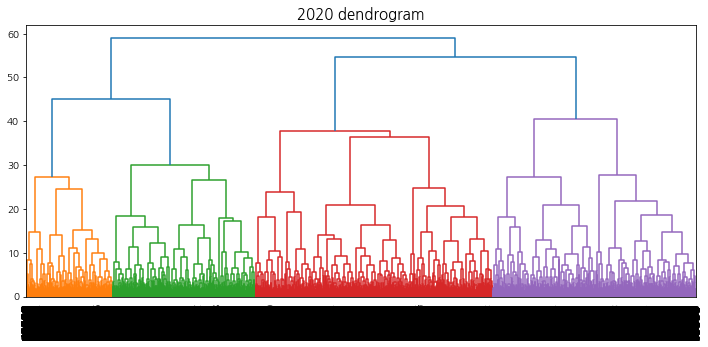

In [24]:
clusters_2020_3 = hierarchical_clustering_plot(method='average', year=2020, cci_type=3, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 47
label 1 > 0.5 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([2, 3, 15, 28, 37], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 3874
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1356  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  78


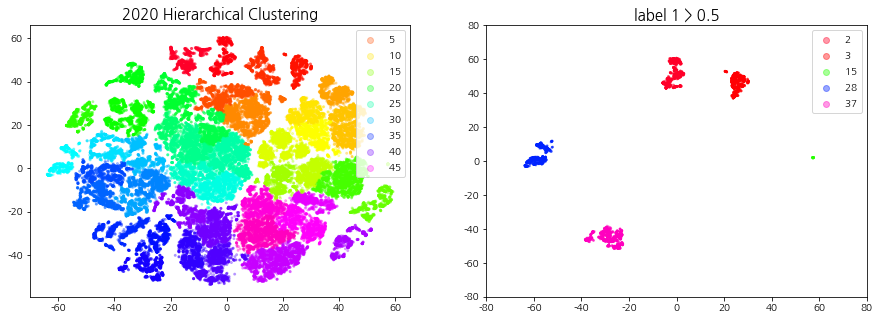

In [36]:
df_shap_2020_3, df_tsne_2020_1_3 = fcluster_plot_and_filtering(clusters_2020_3, 2020, 3, t=12, ratio=0.5, xlim=80, ylim=80)

<br>

#### III. 2021

- Îç¥ÎìúÎ°úÍ∑∏Îû® 

linkage complete


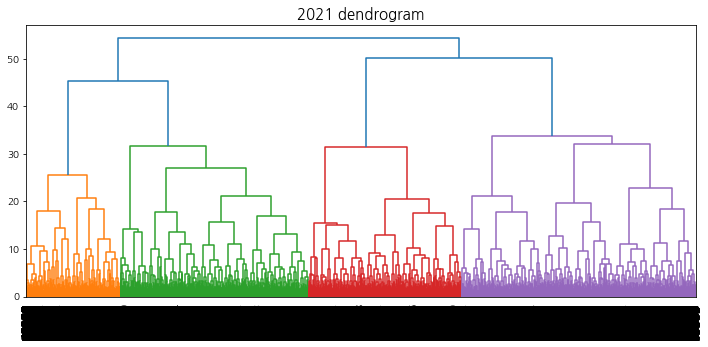

In [25]:
clusters_2021_3 = hierarchical_clustering_plot(method='average', year=2021, cci_type=3, dendrogram=True)

- Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ & ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë ÏÑ†ÌÉù  

Íµ∞ÏßëÏùò Í∞úÏàò: 53
label 1 > 0.35 Íµ∞Ïßë Î≤àÌò∏:  Int64Index([5, 7, 10, 15], dtype='int64', name='Cluster')
Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò: 4174
Ï¢ÖÎ™©Ïùò Ï¢ÖÎ•ò: 1163  |  ÎÇ†ÏßúÏùò Ï¢ÖÎ•ò:  230


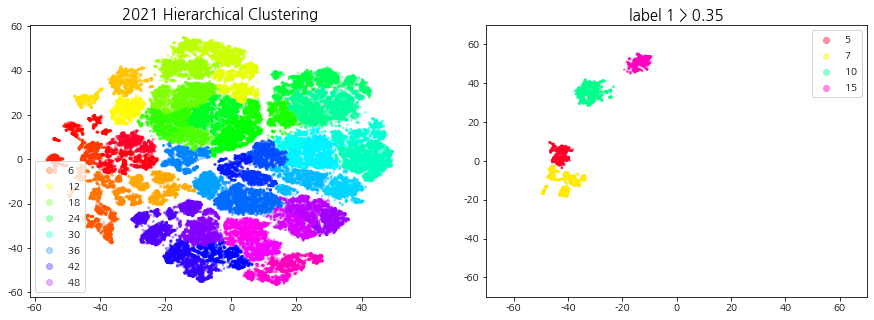

In [38]:
df_shap_2021_3, df_tsne_2021_1_3 = fcluster_plot_and_filtering(clusters_2021_3, 2021, 3, t=10, ratio=0.35)

<br>

#### üåü Í≥ºÎß§ÎèÑÍµ¨Í∞Ñ ÏÉÅÏäπ Ï∂îÏÑ∏ Íµ∞Ïßë Ìï¥ÏÑù 

1) Ïó∞ÎèÑÎ≥Ñ ÎπàÎèÑÏàò ÏÉÅÏúÑ Ï£º & ÎÇ†Ïßú

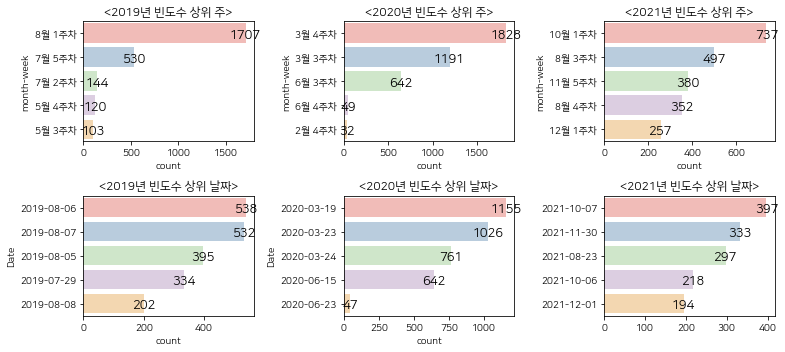

In [43]:
lst_data = [df_tsne_2019_1_3, df_tsne_2020_1_3, df_tsne_2021_1_3]
visualization_week(data_list=lst_data, week_num=5, day_num=5)

`Í≥ºÎß§ÎèÑÍµ¨Í∞Ñ`Ïùò ÎπàÎèÑÏàò ÏÉÅÏúÑ ÎÇ†ÏßúÎäî **2019ÎÖÑ 8Ïõî 1Ï£ºÏ∞®**, **2020ÎÖÑ 3Ïõî 4Ï£ºÏ∞®**, **2021ÎÖÑ 10Ïõî 1Ï£ºÏ∞®**ÏòÄÎã§. CCI Íµ¨Í∞Ñ Ï§ë Ïú†ÏùºÌïòÍ≤å Î™®Îì† Ïó∞ÎèÑÏóêÏÑú ÎÜíÏùÄ ÎÇ†Ïßú ÎπàÎèÑ Ï∞®Ïù¥Î•º Î≥¥ÏòÄÎã§.  

<br>

2) Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÎÇ†ÏßúÏùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏ ÌôïÏù∏ 

- Ïó∞ÎèÑÎ≥Ñ ÏÉÅÏúÑ ÎÇ†ÏßúÏùò ÎûúÎç§ Ï¢ÖÎ™©ÏΩîÎìú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±   

ÏÉÅÏúÑ ÎÇ†ÏßúÎì§ÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ Ïã§ÌñâÌïòÍ≥†, ÎûúÎç§ÏúºÎ°ú ÎÇòÏò§Îäî Ï¢ÖÎ™©ÏΩîÎìúÎì§Ïùò Í∞úÎ≥Ñ Ï¢ÖÎ™© Ï∞®Ìä∏Î•º ÌôïÏù∏ÌïúÎã§.  

In [206]:
#collapse-hide
import datetime
df_tsne_2019_1_3['Date'] = df_tsne_2019_1_3['Date'].astype(str)
df_tsne_2020_1_3['Date'] = df_tsne_2020_1_3['Date'].astype(str)
df_tsne_2021_1_3['Date'] = df_tsne_2021_1_3['Date'].astype(str)

df1 = df_tsne_2019_1_3.loc[df_tsne_2019_1_3['Date'] == '2019-08-06', ['Date', 'Code']].sample(5).reset_index(drop=True)
df2 = df_tsne_2020_1_3.loc[df_tsne_2020_1_3['Date'] == '2020-03-19', ['Date', 'Code']].sample(5).reset_index(drop=True)
df3 = df_tsne_2021_1_3.loc[df_tsne_2021_1_3['Date'] == '2021-10-07', ['Date', 'Code']].sample(5).reset_index(drop=True)

pd.concat([df1, df2, df3], axis=1)

Date    Code        Date    Code        Date    Code
0  2019-08-06  033100  2020-03-19  126880  2021-10-07  028300
1  2019-08-06  060480  2020-03-19  000850  2021-10-07  088130
2  2019-08-06  014190  2020-03-19  170920  2021-10-07  042110
3  2019-08-06  123860  2020-03-19  189860  2021-10-07  081000
4  2019-08-06  067990  2020-03-19  079160  2021-10-07  002690

- Ï∞®Ìä∏ ÌôïÏù∏ ÏòàÏãú

**2019ÎÖÑ 8Ïõî 6Ïùº**   
![image.png](attachment:e5aad13f-b5ab-4589-84b6-3cb023521430.png "Ï¢ÖÎ™©ÏΩîÎìú: 033100")

**2020ÎÖÑ 3Ïõî 19Ïùº**   
![image.png](attachment:6ce4c3be-d169-4484-9d60-275e8fa2aa1b.png "Ï¢ÖÎ™©ÏΩîÎìú: 126880")

**2021ÎÖÑ 10Ïõî 17Ïùº**    
![image.png](attachment:08ea2063-05eb-4861-b19a-9e6cb11ca11a.png "Ï¢ÖÎ™©ÏΩîÎìú: 088130")
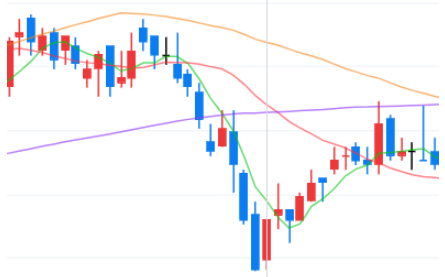
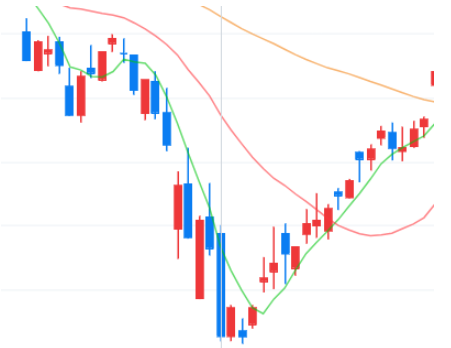
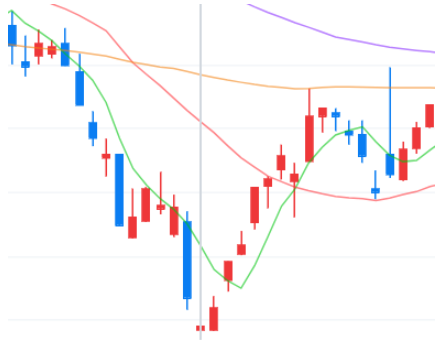

ÏúÑÏùò ÏÇ¨ÏßÑÍ≥º Í∞ôÏù¥, Î™®Îì† Ïó∞ÎèÑÏóêÏÑú ÎπÑÏä∑Ìïú Ìå®ÌÑ¥ÏùÑ Î≥¥ÏòÄÎã§. `ÌïòÎùΩÏ∂îÏÑ∏ÏóêÏÑú ÏÉÅÏäπÏ∂îÏÑ∏Î°ú Ï†ÑÌôòÎêòÎäî VÏûê ÌòïÌÉú`Ïùò Í≥µÌÜµÎêú Ìå®ÌÑ¥ÏóêÏÑú, `Í∏∞Ï§ÄÏùº(D0)[ÌöåÏÉâ ÏÑ†]Ïù¥ Íº≠ÏßÄÏ†ê Í∑ºÏ≤òÏóê ÏúÑÏπò`ÌïòÏòÄÎã§.

<br>
<br>

## (2) Ï†ïÎ¶¨

ÏßÄÍ∏àÍπåÏßÄ `Î∂ÑÎ•ò Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÌïôÏäµ`, `SHAP ÌëúÏ§ÄÌôî`, `ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù`Ïùò Í≥ºÏ†ïÏùÑ Í±∞Ï≥ê `10Ïùº Í∞ÑÏùò Ï£ºÍ∞Ä ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú`Î∂ÄÌÑ∞ Ï£ºÍ∞Ä `ÏÉÅÏäπ Ï∂îÏÑ∏ Ìå®ÌÑ¥`ÏùÑ Í≤ÄÏ∂úÌïòÏòÄÎã§.

CCI Íµ¨Í∞Ñ Î≥Ñ, Ïó∞ÎèÑ Î≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Ïó∞Íµ¨Î•º ÏßÑÌñâÌïòÏòÄÎäîÎç∞, 

1\) **CCI Íµ¨Í∞Ñ** Î≥Ñ Í≥µÌÜµÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî Ìå®ÌÑ¥ÏùÄ **ÌïòÎùΩÏ∂îÏÑ∏ÏóêÏÑú ÏÉÅÏäπÏ∂îÏÑ∏Î°ú Ï†ÑÌôòÎêòÎäî VÏûê ÏÉÅÏäπÎ∞òÏ†ÑÌòï Ìå®ÌÑ¥**Ïù¥ÏóàÏúºÎ©∞, Í∏∞Ï§ÄÏùº(D0)Ïùò ÏúÑÏπòÍ∞Ä CCI Íµ¨Í∞ÑÏóê Îî∞Îùº Îã§Î•¥Í≤å ÎÇòÌÉÄÎÇ¨Îã§. ÌäπÌûàÎÇò `Í≥ºÎß§ÎèÑÍµ¨Í∞Ñ`ÏóêÏÑúÏùò Ìå®ÌÑ¥Ïù¥ Îã§Î•∏ Íµ¨Í∞ÑÏóê ÎπÑÌï¥ Í∞ÄÏû• Ï†ïÌôïÌïòÍ≥† Ïú†ÏÇ¨Ìïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

2\) Î™®Îì† CCI Íµ¨Í∞ÑÏùÑ ÌÜµÌãÄÏñ¥ **2019, 2020, 2021ÎÖÑÎèÑ** Ï§ë ÎÜíÏùÄ ÎπàÎèÑÎ°ú ÎÇòÌÉÄÎÇòÎäî ÎÇ†ÏßúÏùò Ìé∏Ï§ëÏù¥ Í∞ÄÏû• ÌÅ∞ Ïó∞ÎèÑÎäî **2020ÎÖÑ**Ïù¥ÏóàÏúºÎ©∞, 2020ÎÖÑÎèÑÏóêÏÑú Ìå®ÌÑ¥Ïùò Î™®Ïñë ÎòêÌïú Í∞ÄÏû• Ïú†ÏÇ¨ÌïòÍ≤å ÎÇòÌÉÄÎÇ¨Îã§. 